In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy.sparse import csr_matrix
from IPython.display import display
from sklearn.cluster import KMeans 

In [2]:
# Import the Movies dataset
movies = pd.read_csv('movies.csv')
movies.head()

,movieid,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
# Import the ratings dataset
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userid,movieid,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
# Import the users dataset
users = pd.read_csv('users.csv')
users.head()

,userid,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [6]:
#Separate men from women
female = users[users['gender'] == "F"]
print(female.head())
male = users[users['gender'] == "M"]
print(male.head())

    userid gender  age  occupation zip-code
0        1      F    1          10    48067
5        6      F   50           9    55117
9       10      F   35           1    95370
10      11      F   25           1    04093
15      16      F   35           0    20670
   userid gender  age  occupation zip-code
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455
6       7      M   35           1    06810


In [7]:
#All men rate scores and all women rate scores
f = female['userid']
m = male['userid']
a = []
b = []
for i in f:
    a.append(i)
a = a[1:]
rat_female = ratings.loc[ratings['userid'] == 1]
for j in a:
    rat_female = rat_female.append(ratings.loc[ratings['userid'] == j])
print("female's rate scores:")
print(rat_female)
for x in m:
    b.append(x)
b = b[1:]
rat_male = ratings.loc[ratings['userid'] == 2]
for y in b:
    rat_male = rat_male.append(ratings.loc[ratings['userid'] == y])
print("male's rate scores:")
print(rat_male)

female's rate scores:
       userid  movieid  rating   timestamp
0           1       31     2.5  1260759144
1           1     1029     3.0  1260759179
2           1     1061     3.0  1260759182
3           1     1129     2.0  1260759185
4           1     1172     4.0  1260759205
...       ...      ...     ...         ...
99816     668     3000     3.0   993613196
99817     668     3039     3.0   993613196
99818     668     3213     3.0   993613359
99819     668     4012     3.0   993613196
99820     668     6425     1.0   993613478

[27508 rows x 4 columns]
male's rate scores:
        userid  movieid  rating   timestamp
20           2       10     4.0   835355493
21           2       17     5.0   835355681
22           2       39     5.0   835355604
23           2       47     4.0   835355552
24           2       50     4.0   835355586
...        ...      ...     ...         ...
99999      671     6268     2.5  1065579370
100000     671     6269     4.0  1065149201
100001     671     6

In [8]:
#Calculate men's and women's average ratings for all films
rat_female_average = rat_female['rating'].mean(axis=0)
print(rat_female_average)
rat_male_average = rat_male['rating'].mean(axis=0)
print(rat_male_average)

3.4998182346953612
3.5602240123593027


In [9]:
#Calculate the user's average ratings for various movie genres
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:
        genre_movies = movies[movies['genres'].str.contains(genre)]
        avg_genre_votes_per_user = \
        ratings[ratings['movieid'].isin(genre_movies['movieid'])].loc[:, ['userid', 'rating']].groupby(['userid'])[
            'rating'].mean().round(2)
genre_ratings = helper.get_genre_ratings(ratings, movies, ['Drama', 'Thriller', 'Adventure', 'Animation', 'Children', 'Fantasy', 'Romance', 'Action', 'Horror'], ['avg_drama_rating', 'avg_thriller_rating', 'avg_adventure_rating', 'avg_animation_rating', 'avg_children_rating', 'avg_fantasy_rating', 'avg_romance_rating', 'avg_action_rating', 'avg_horror_rating'])
genre_ratings.head()

,avg_drama_rating,avg_thriller_rating,avg_adventure_rating,avg_animation_rating,avg_children_rating,avg_fantasy_rating,avg_romance_rating,avg_action_rating,avg_horror_rating
1,2.57,2.83,2.17,2.00,2.50,2.12,3.50,2.80,3.00
2,3.62,3.33,3.75,3.67,3.50,3.40,3.59,3.32,3.50
3,3.92,3.55,3.30,2.88,2.70,3.00,3.65,3.47,3.38
4,4.46,4.02,4.34,4.71,4.63,4.57,4.50,4.27,3.94
5,3.81,3.62,3.82,3.90,3.89,3.75,4.08,4.00,3.88


In [10]:
#Male and female ratings for each type of film were calculated separately
genre_ratings_female = genre_ratings.loc[a, :]
genre_ratings_female.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(genre_ratings_female.head(), "\n"*5)
genre_ratings_male = genre_ratings.loc[b, :]
genre_ratings_male.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
print(genre_ratings_male.head())

    avg_drama_rating  avg_thriller_rating  avg_adventure_rating  \
6               3.55                 2.72                  3.73   
30              3.96                 3.79                  3.62   
34              4.04                 3.97                  3.93   
38              4.35                 4.18                  4.05   
41              3.92                 3.88                  3.96   

    avg_animation_rating  avg_children_rating  avg_fantasy_rating  \
6                   3.50                 3.20                3.69   
30                  3.95                 3.53                3.46   
34                  4.00                 3.50                3.36   
38                  4.00                 3.88                4.06   
41                  3.70                 3.93                3.92   

    avg_romance_rating  avg_action_rating  avg_horror_rating  
6                 2.90               3.27               3.33  
30                3.88               3.61               

c:\users\dell\pycharmprojects\pythonproject\venv\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [11]:
#Calculate the average scores of men and women separately
dic = ['avg_horror_rating', 'avg_action_rating', 'avg_romance_rating', 'avg_fantasy_rating', 'avg_children_rating', 'avg_animation_rating', 'avg_adventure_rating', 'avg_thriller_rating','avg_drama_rating']
for i in dic:
    print(str(i))
    print(genre_ratings_female[str(i)].mean(axis=0))
    print(genre_ratings_male[str(i)].mean(axis=0))

avg_horror_rating
3.3692413793103446
3.4928804347826086
avg_action_rating
3.4880689655172414
3.5380978260869567
avg_romance_rating
3.6095862068965516
3.6617934782608694
avg_fantasy_rating
3.5415862068965516
3.613831521739131
avg_children_rating
3.490206896551724
3.5287499999999996
avg_animation_rating
3.62351724137931
3.620543478260869
avg_adventure_rating
3.5364137931034483
3.564673913043478
avg_thriller_rating
3.5924827586206893
3.6539130434782607
avg_drama_rating
3.7461379310344833
3.7735597826086957


In [12]:
#Count the number of times the movie genre appears
dic = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime','Horror','Thriller','Sci-Fi','Mystery','War','IMAX','Documentary','Musical']
ydic = ['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Romance', 'Drama', 'Action', 'Crime','Horror','Thriller','Sci-Fi','Mystery','War','IMAX','Documentary','Musical']
for i,y in zip(dic,ydic):
    y = 0
    for j in movies['genres']:
        if str(i) in j:
            y += 1
    print(str(i), ":", y)
#Since Drama, Comedy, Action, Romance and Thriller are far more than other films, we choose the film types in the formulation

Adventure : 1117
Animation : 447
Children : 583
Comedy : 3315
Fantasy : 654
Romance : 1545
Drama : 4365
Action : 1545
Crime : 1100
Horror : 877
Thriller : 1729
Sci-Fi : 792
Mystery : 543
War : 367
IMAX : 153
Documentary : 495
Musical : 394


In [13]:
#Check out the average female user's ratings for each genre
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:
        genre_movies = movies[movies['genres'].str.contains(genre)]
        avg_genre_votes_per_user = \
        ratings[ratings['movieid'].isin(genre_movies['movieid'])].loc[:, ['userid', 'rating']].groupby(['userid'])[
            'rating'].mean().round(2)
f_r_g_part = helper.get_genre_ratings(rat_female, movies, ['Drama', 'Comedy', 'Action', 'Romance', 'Thriller'], ['avg_drama_rating', 'avg_comedy_rating', 'avg_action_rating', 'avg_romance_rating', 'avg_thriller_rating'])
f_r_g_part.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

f_r_g_part.head()

,avg_drama_rating,avg_comedy_rating,avg_action_rating,avg_romance_rating,avg_thriller_rating
1,2.57,2.00,2.80,3.50,2.83
6,3.55,2.91,3.27,2.90,2.72
10,4.07,3.58,3.67,3.86,3.50
11,4.13,3.70,4.19,4.50,4.03
16,4.14,4.14,3.75,4.21,4.00


In [14]:
#Check out the average male user's ratings for each genre
def get_genre_ratings(ratings, movies, genres, column_names):
    genre_ratings = pd.DataFrame()
    for genre in genres:
        genre_movies = movies[movies['genres'].str.contains(genre)]
        avg_genre_votes_per_user = \
        ratings[ratings['movieid'].isin(genre_movies['movieid'])].loc[:, ['userid', 'rating']].groupby(['userid'])[
            'rating'].mean().round(2)
m_r_g_part = helper.get_genre_ratings(rat_male, movies, ['Drama', 'Comedy', 'Action', 'Romance', 'Thriller'], ['avg_drama_rating', 'avg_comedy_rating', 'avg_action_rating', 'avg_romance_rating', 'avg_thriller_rating'])
m_r_g_part.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
m_r_g_part.head()


,avg_drama_rating,avg_comedy_rating,avg_action_rating,avg_romance_rating,avg_thriller_rating
2,3.62,3.09,3.32,3.59,3.33
3,3.92,3.61,3.47,3.65,3.55
4,4.46,4.33,4.27,4.50,4.02
5,3.81,3.98,4.00,4.08,3.62
7,3.52,3.54,3.29,2.93,3.00


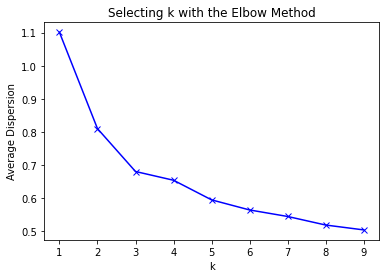

In [15]:
#female clustering
from scipy.spatial.distance import cdist
zscore_data_f = (f_r_g_part-f_r_g_part.mean())/f_r_g_part.std()
K = range(1, 10)
meandistortions = []
for k in K:
    kmeans_s_f = KMeans(n_clusters=k)
    kmeans_s_f.fit(f_r_g_part)
    meandistortions.append(sum(np.min(cdist(f_r_g_part, kmeans_s_f.cluster_centers_, 'euclidean'), axis=1))/f_r_g_part.shape[0])
    #cdist: Calculate the distance of all vector pairs between two matrix rows'euclidean' Euclidean distance
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()


#The elbow method shows that 3 is more appropriate for k, but 6 is better for classification after viewing the radar chart.
kmeans_f = KMeans(n_clusters=6)
kmeans_f.fit_predict(f_r_g_part)
#Count the number of each category
r_l_f = list(kmeans_f.labels_)
r_l_f.sort()
r_s_f = pd.Series(r_l_f) 
r11111 = r_s_f.value_counts()
r1 = r11111.sort_index()


r2 = pd.DataFrame(kmeans_f.cluster_centers_) #Find the cluster center
r = pd.concat([r2, r1], axis=1) #Horizontal connection (0 is vertical) to get the number of categories corresponding to the cluster centers
r.columns = list(f_r_g_part.columns) + ['类别数目']
r

outputpath='C:\\Users\\Dell\\Desktop\\r.csv'
r.to_csv(outputpath, sep=',', index=False, header=False)


In [16]:
#Detailed output of the category corresponding to each sample
r3 = pd.concat([f_r_g_part, pd.Series(kmeans_f.labels_, index=f_r_g_part.index)], axis=1)  
r3.columns =list(f_r_g_part) + ['聚类类别']  #Rename header
print(r3)

     avg_drama_rating  avg_comedy_rating  avg_action_rating  \
1                2.57               2.00               2.80   
6                3.55               2.91               3.27   
10               4.07               3.58               3.67   
11               4.13               3.70               4.19   
16               4.14               4.14               3.75   
..                ...                ...                ...   
658              4.42               4.40               4.50   
659              3.55               3.33               3.23   
663              3.69               3.79               3.73   
666              3.14               2.71               2.85   
668              4.31               3.44               3.50   

     avg_romance_rating  avg_thriller_rating  聚类类别  
1                  3.50                 2.83     2  
6                  2.90                 2.72     2  
10                 3.86                 3.50     5  
11                 4.50        

In [17]:
#Radar chart with R drawing

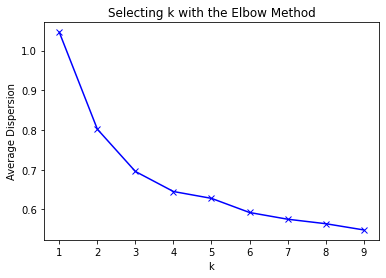

In [18]:
#male cluster
zscore_data_m = (m_r_g_part-m_r_g_part.mean())/m_r_g_part.std()
N = range(1, 10)
meandistortions2 = []
for k in N:
    kmeans_s_m = KMeans(n_clusters=k)
    kmeans_s_m.fit(m_r_g_part)
    meandistortions2.append(sum(np.min(cdist(m_r_g_part, kmeans_s_m.cluster_centers_, 'euclidean'), axis=1))/m_r_g_part.shape[0])
    ##cdist: Calculate the distance of all vector pairs between two matrix rows'euclidean' Euclidean distance
plt.plot(K, meandistortions2, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()


#The elbow method shows that 3 is more appropriate for k, but 6 is better for classification after viewing the radar chart.
kmeans_m = KMeans(n_clusters=6)
kmeans_m.fit_predict(m_r_g_part)
#Count the number of each category
r_l_m = list(kmeans_m.labels_)
r_l_m.sort()
r_s_m = pd.Series(r_l_m) 
r33333 = r_s_m.value_counts()
r3 = r33333.sort_index()


r4 = pd.DataFrame(kmeans_m.cluster_centers_) #Find the cluster center
rr = pd.concat([r3, r4], axis=1) #Horizontal connection (0 is vertical) to get the number of categories corresponding to the cluster centers
rr.columns = list(m_r_g_part.columns) + ['类别数目']
rr

outputpath='C:\\Users\\Dell\\Desktop\\rr.csv'
rr.to_csv(outputpath, sep=',', index=False, header=False)

In [19]:
#Radar chart with R drawing

In [20]:
#View the classification results of each male user and import the file
abcd = list(kmeans_m.labels_)
print(abcd)
abcde = pd.Series(abcd)
outputpath='C:\\Users\\Dell\\Desktop\\abcde.csv'
abcde.to_csv(outputpath, sep=' ', index=False, header=False)

[4, 2, 5, 1, 4, 1, 2, 4, 2, 3, 3, 2, 2, 4, 2, 4, 2, 4, 2, 2, 0, 5, 4, 3, 2, 1, 5, 1, 4, 4, 5, 1, 2, 2, 2, 4, 1, 2, 1, 4, 5, 2, 1, 1, 1, 1, 2, 5, 5, 4, 5, 1, 4, 4, 2, 2, 4, 4, 2, 5, 2, 4, 1, 4, 1, 2, 1, 4, 0, 2, 1, 5, 2, 1, 5, 1, 2, 4, 1, 4, 1, 2, 2, 1, 2, 1, 4, 4, 2, 1, 1, 0, 2, 0, 4, 3, 2, 2, 5, 5, 1, 2, 4, 4, 1, 5, 2, 4, 0, 1, 2, 4, 3, 2, 5, 3, 2, 1, 4, 1, 2, 2, 2, 5, 1, 2, 2, 2, 3, 1, 4, 2, 3, 1, 2, 2, 1, 4, 4, 4, 3, 1, 4, 1, 4, 1, 2, 5, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 5, 1, 1, 1, 5, 1, 4, 2, 1, 4, 4, 4, 1, 2, 5, 5, 5, 2, 4, 2, 4, 2, 1, 4, 2, 2, 1, 2, 1, 2, 2, 2, 0, 5, 2, 5, 3, 2, 4, 5, 2, 2, 4, 4, 5, 1, 1, 2, 1, 5, 2, 1, 1, 4, 4, 2, 2, 4, 5, 2, 5, 4, 2, 4, 1, 2, 2, 2, 2, 1, 1, 2, 1, 4, 1, 0, 5, 4, 4, 0, 4, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 3, 5, 4, 2, 1, 2, 2, 4, 1, 2, 1, 1, 2, 2, 4, 4, 4, 4, 2, 3, 2, 2, 2, 4, 4, 4, 0, 4, 2, 1, 5, 2, 1, 2, 2, 5, 1, 1, 1, 4, 1, 3, 4, 4, 1, 1, 2, 0, 0, 4, 2, 3, 1, 5, 2, 1, 1, 2, 4, 2, 2, 5, 5, 4, 2, 5, 5, 5, 1, 4, 2, 5, 1, 3, 2, 2, 3, 2, 4, 1, 2, 2, 2, 

In [35]:
#View the id of male user cluster 0
m_k = pd.read_csv('m_k.csv')
m_k = pd.DataFrame(m_k)
m_k_0 = m_k[m_k['class']==0]
m_k_0_id = m_k_0['users_id']
m_k_0_id = list(m_k_0_id)
print(m_k_0_id)
print("lenth:",len(m_k_0_id))

[2, 7, 9, 12, 15, 17, 19, 20, 25, 33, 34, 35, 38, 42, 47, 55, 56, 59, 61, 66, 70, 73, 77, 82, 83, 85, 89, 93, 97, 98, 102, 107, 111, 114, 117, 121, 122, 123, 126, 127, 128, 132, 135, 136, 137, 147, 151, 166, 172, 176, 178, 180, 183, 184, 186, 188, 189, 190, 193, 196, 199, 200, 206, 209, 214, 215, 218, 221, 224, 225, 226, 227, 228, 230, 242, 243, 244, 245, 249, 250, 254, 256, 257, 260, 263, 264, 269, 271, 273, 279, 282, 284, 285, 289, 296, 297, 301, 305, 308, 310, 311, 315, 321, 325, 326, 328, 331, 332, 333, 334, 340, 341, 343, 345, 346, 348, 349, 359, 363, 364, 369, 370, 373, 374, 376, 381, 382, 386, 389, 390, 400, 403, 404, 405, 406, 413, 417, 425, 428, 429, 431, 432, 433, 434, 441, 443, 446, 447, 451, 454, 457, 463, 465, 467, 469]
lenth: 155


In [22]:
#The data set is constructed into the form of user ID and user rating for each movie
ratings_title = pd.merge(ratings, movies[['movieid', 'title']], on='movieid' )
user_movie_ratings = pd.pivot_table(ratings_title, index='userid', columns= 'title', values='rating')
print('dataset dimensions: ', user_movie_ratings.shape, '\n\nSubset example:')

outputpath='C:\\Users\\Dell\\Desktop\\user_movie_ratings.csv'
user_movie_ratings.to_csv(outputpath, sep=' ', index=False, header=False)
#user_movie_ratings['user_id'] = ''
iii = []
for i in range(1,9065):
    iii.append(i)
iii = pd.DataFrame(iii)
#print(iii)
user_movie_ratings = pd.concat([iii, user_movie_ratings],axis=1)
outputpath='C:\\Users\\Dell\\Desktop\\user_movie_ratings.txt'
user_movie_ratings.to_csv(outputpath, sep=' ', index=False, header=False)
user_movie_ratings.iloc[:6, :10]


dataset dimensions:  (671, 9064) 

Subset example:


,0,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986)
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
#View the average score of movies for male user group 1
m_k_0_id = [i-1 for i in m_k_0_id]
m_k_r_0 = user_movie_ratings.loc[m_k_0_id, :]
print(m_k_0_id)
m_k_r_0

[1, 6, 8, 11, 14, 16, 18, 19, 24, 32, 33, 34, 37, 41, 46, 54, 55, 58, 60, 65, 69, 72, 76, 81, 82, 84, 88, 92, 96, 97, 101, 106, 110, 113, 116, 120, 121, 122, 125, 126, 127, 131, 134, 135, 136, 146, 150, 165, 171, 175, 177, 179, 182, 183, 185, 187, 188, 189, 192, 195, 198, 199, 205, 208, 213, 214, 217, 220, 223, 224, 225, 226, 227, 229, 241, 242, 243, 244, 248, 249, 253, 255, 256, 259, 262, 263, 268, 270, 272, 278, 281, 283, 284, 288, 295, 296, 300, 304, 307, 309, 310, 314, 320, 324, 325, 327, 330, 331, 332, 333, 339, 340, 342, 344, 345, 347, 348, 358, 362, 363, 368, 369, 372, 373, 375, 380, 381, 385, 388, 389, 399, 402, 403, 404, 405, 412, 416, 424, 427, 428, 430, 431, 432, 433, 440, 442, 445, 446, 450, 453, 456, 462, 464, 466, 468]


,0,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
462,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
464,465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
466,467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN


In [57]:
#Randomly select a movie, calculate the average score of male group 1 on the movie, and then decide whether to recommend the movie to the users of male group 1 who have not seen it
forrest = m_k_r_0['Forrest Gump (1994)']
forrest = pd.DataFrame(forrest)
forrest_ed = forrest.dropna(axis=0, how='all')
print(forrest_ed)
forrest_0_sum = forrest_ed['Forrest Gump (1994)'].mean()
print(forrest_0_sum)


     Forrest Gump (1994)
8                    4.0
19                   5.0
24                   4.0
32                   5.0
41                   3.5
..                   ...
442                  5.0
445                  5.0
456                  4.0
462                  5.0
468                  3.0

[88 rows x 1 columns]
4.221590909090909


In [59]:
#We can find that group 1 has a very high score for Forrest Gump (1994), so we recommend it to other users in the group who have not seen the film. The following is to find out the users in group 1 who have not seen the film
forrest_a0 = forrest.fillna(0)
forrest_a00 = forrest_a0[forrest_a0['Forrest Gump (1994)' ] == 0]
forrest_indexl = list(forrest_a00.index)
print(forrest_indexl)
#The following is the ID of users who have not seen the movie. You can recommend this movie to users with these IDs

[1, 6, 11, 14, 16, 18, 33, 34, 37, 46, 54, 55, 58, 60, 65, 76, 81, 96, 101, 106, 113, 135, 136, 171, 175, 179, 183, 189, 198, 214, 217, 223, 224, 226, 227, 229, 256, 270, 272, 278, 284, 296, 307, 309, 310, 325, 327, 330, 331, 332, 342, 347, 363, 368, 372, 389, 399, 403, 404, 412, 424, 427, 446, 450, 453, 464, 466]
